In [1]:
import os
from os import path
from pathlib import Path
import numpy as np
import pandas as pd

In [2]:
from datetime import datetime
date = datetime.today().strftime('%y%m%d')
print ('Last modified: ' + date)

Last modified: 211213


In [3]:
df = pd.read_csv('Technology Use (YA)_December 13, 2021_08.40.csv', encoding = "ISO-8859-1")
df = df.drop(df.index[[0,1]]) #drop top rows

# Fix erroneous response

In [4]:
df.loc[df['id'].isin( ['5cf3f7364bcc6400019d71fa']), 'age'] = 64

# To numeric

In [5]:
cols = df.columns.drop('ResponseId','id')
df[cols] = df[cols].apply(pd.to_numeric, errors='ignore')

# Screen for catch trials!!!

In [6]:
df = df.drop(df[df.wifi_print_3 != 1].index)

# Computer proficiency

In [7]:
names = df.columns[pd.Series(df.columns).str.startswith('comp_')]
df['cpq'] = df[names].sum(axis=1)

# Mobile proficiency

In [8]:
names = df.columns[pd.Series(df.columns).str.startswith('mobile_')]
df['mdpq'] = df[names].sum(axis=1)

# Wifi proficiency

In [9]:
names = df.columns[pd.Series(df.columns).str.startswith('wifi_')]
df['wnpq'] = df[names].sum(axis=1) - 1
# minus one is for the catch trial


# All proficiency

In [10]:
df['all_proficiency'] = df['cpq'] + df['mdpq'] + df['wnpq']

# Hardware

In [11]:
names = df.columns[pd.Series(df.columns).str.startswith('hardware')]
df['hardware'] = df[names].sum(axis=1)

# Software

In [12]:
names = df.columns[pd.Series(df.columns).str.startswith('software')]
df['software'] = df[names].sum(axis=1)
df['software']

2     24
3     23
4     32
6     25
7     26
8     33
9     24
10    28
11    25
12    22
13    28
14    21
15    29
16    26
17    33
18    27
19    25
20    27
21    21
22    31
23    28
24    28
25    21
27    19
28    26
29    31
30    32
31    28
32    21
34    31
Name: software, dtype: int64

# Recall

In [13]:
df = df.apply(lambda x: x.str.lower() if x.dtype=='object' else x) #convert ALL string columns to lowercase

In [14]:
correct = ['book','child','gold','hotel','king','market','paper','river','skin','tree']
imm_columns = ['imm_1', 'imm_2', 'imm_3', 'imm_4', 'imm_5', 'imm_6','imm_7', 'imm_8', 'imm_9', 'imm_10']
delay_columns = ['delay_1', 'delay_2', 'delay_3', 'delay_4', 'delay_5', 'delay_6','delay_7', 'delay_8', 'delay_9', 'delay_10']

## Immediate recall

In [15]:
df_transposed = df[imm_columns].T #transpose the df

a = list()
#keep only unique recall answers
for i in df_transposed.columns:
    a.append(df_transposed[i].unique())
    
# recall scoring rules
# for each cell, verify if a word is one of the ten; if yes, add 1 to the score
b = [0]*len(a)
x = 0
for i in a:
    for j in i:
        if j in correct: 
            b[x] = b[x] + 1
    x = x + 1
    
df['imm_sum'] = b

## Delayed recall

In [16]:
df_transposed = df[delay_columns].T #transpose the df

a = list()
#keep only unique recall answers
for i in df_transposed.columns:
    a.append(df_transposed[i].unique())
    
# recall scoring rules
# for each cell, verify if a word is one of the ten; if yes, add 1 to the score
b = [0]*len(a)
x = 0
for i in a:
    for j in i:
        if j in correct: 
            b[x] = b[x] + 1
    x = x + 1
    
df['delay_sum'] = b

In [17]:
df['delay_sum']

2     0
3     7
4     9
6     0
7     6
8     9
9     9
10    0
11    0
12    4
13    6
14    9
15    2
16    8
17    5
18    0
19    0
20    8
21    6
22    7
23    0
24    6
25    4
27    6
28    7
29    7
30    5
31    3
32    5
34    0
Name: delay_sum, dtype: int64

# Sense of control

In [18]:
a = ['control_1', 'control_2', 'control_4', 'control_5', 'control_7', 'control_9', 'control_10','control_11']
b = ['control_3', 'control_6', 'control_8','control_12']

In [19]:
df['constraints'] = df[a].sum(axis=1)
df['mastery'] = df[b].sum(axis=1)


# Physical limitations

In [20]:
names = df.columns[pd.Series(df.columns).str.startswith('limitation')]
df['limitations'] = df[names].sum(axis=1)
df['limitations']

2      0.0
3      0.0
4      0.0
6      2.0
7      0.0
8      1.0
9      1.0
10     0.0
11     0.0
12     0.0
13     0.0
14     0.0
15     0.0
16     0.0
17     2.0
18     0.0
19     0.0
20     3.0
21    10.0
22     0.0
23     0.0
24     0.0
25     3.0
27     0.0
28     0.0
29     0.0
30     0.0
31     9.0
32     0.0
34     0.0
Name: limitations, dtype: float64

# Visual spatial abilities

In [21]:
names = df.columns[pd.Series(df.columns).str.startswith('visual')]
df['visual'] = df[names].sum(axis=1)
df['visual']

2     2.0
3     4.0
4     3.0
6     5.0
7     3.0
8     2.0
9     4.0
10    1.0
11    3.0
12    2.0
13    3.0
14    4.0
15    3.0
16    3.0
17    2.0
18    2.0
19    5.0
20    4.0
21    3.0
22    1.0
23    1.0
24    5.0
25    1.0
27    3.0
28    5.0
29    2.0
30    1.0
31    4.0
32    5.0
34    1.0
Name: visual, dtype: float64

In [22]:
# df['visual_modified'] = df['visual'] - df['visual1']

# Perceived usefulness

In [23]:
names = df.columns[pd.Series(df.columns).str.startswith('useful')]
df['useful'] = df[names].sum(axis=1)

In [24]:
df['useful']

2     12.0
3      9.0
4     15.0
6     15.0
7     15.0
8     13.0
9     13.0
10    12.0
11    13.0
12    12.0
13    15.0
14    13.0
15    15.0
16    14.0
17    13.0
18    11.0
19    10.0
20    14.0
21    15.0
22    15.0
23    15.0
24    13.0
25    15.0
27    14.0
28    12.0
29    14.0
30    15.0
31    15.0
32    13.0
34    15.0
Name: useful, dtype: float64

# Subset

In [25]:
df1 = df.rename(columns={"Duration (in seconds)": "duration"})
# df1 = df1[df1['imm_trouble'] != 1]

# Detect duplicates

In [26]:
df1[df1['id'].duplicated() == True]


,StartDate,EndDate,Status,IPAddress,Progress,duration,Finished,RecordedDate,ResponseId,RecipientLastName,...,all_proficiency,hardware,software,imm_sum,delay_sum,constraints,mastery,limitations,visual,useful


In [27]:
df1 = df1.drop_duplicates(subset=['id'], keep='first')

In [28]:
subset = ['ResponseId', 'id','cpq','mdpq','wnpq','all_proficiency','hardware','software',
          'imm_sum','delay_sum','constraints','mastery', 'useful',
          'map','volunteer','charity','plan','dental','pay_prescription', 'pay_hospital','visual','limitations',
          'checking','retirement','vehicle','inheritance_1','debts',
          'age','sage','education','gender','hispanic','race','couple',
          'shealth','hearing','vision','alcohol','effort','adopt_age','duration']

df2 = df1[subset]

# Save 

In [29]:
df2 = df2.dropna(subset=['age','map','plan']) #drop rows with missing data
df2 = df2[df2['cpq'] != 0]
df2.to_csv(('prolific_ya_'+ date + '.csv'),index = False)

# Check data

In [30]:
df2.head()

,ResponseId,id,cpq,mdpq,wnpq,all_proficiency,hardware,software,imm_sum,delay_sum,...,hispanic,race,couple,shealth,hearing,vision,alcohol,effort,adopt_age,duration
2,r_3fjdihpjdg9ecc9,60d1220ee97a3b16edd3c882,48.0,68.0,37.0,153.0,3,24,0,0,...,1,5,0,2.0,4.0,4.0,1.0,0.0,11,721
3,r_1jem0pbbflu9ghm,5ab56fdff69e940001d8da97,48.0,66.0,33.0,147.0,3,23,7,7,...,0,1,0,4.0,4.0,3.0,1.0,0.0,10,1378
4,r_1gscne5q79j1xwh,6146896c628ef8ccdb2abf0a,49.0,68.0,38.0,155.0,5,32,9,9,...,0,1,0,3.0,4.0,5.0,0.0,0.0,10,476
6,r_3pdzevya5xzglcv,61202b6be797314915cb1bd7,44.0,67.0,24.0,135.0,4,25,0,0,...,0,1,0,3.0,5.0,4.0,0.0,1.0,4,944
7,r_1jya6pjntcu95ej,61003dc52ef1560d130aa57b,42.0,66.0,34.0,142.0,6,26,6,6,...,0,1,0,3.0,5.0,4.0,1.0,0.0,8,1158


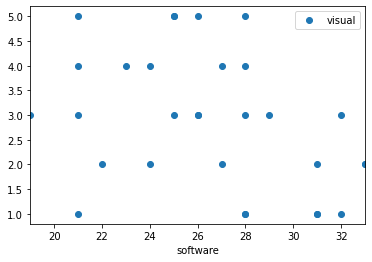

In [31]:
df2.plot(x='software', y='visual', style='o')


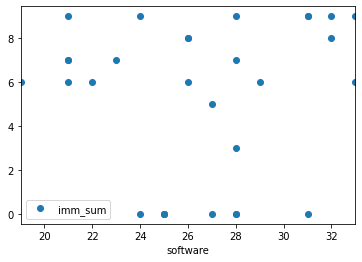

In [32]:
df2.plot(x='software', y='imm_sum', style='o')



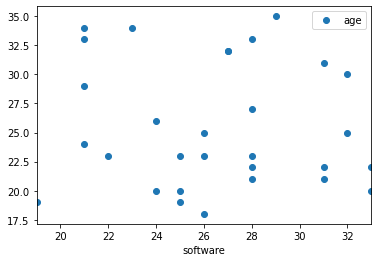

In [33]:
df2.plot(x='software', y='age', style='o')


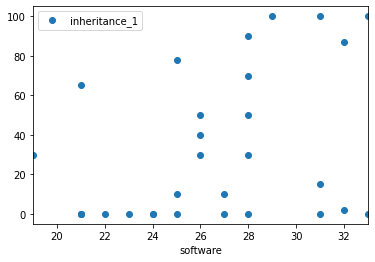

In [34]:
df2.plot(x='software', y='inheritance_1', style='o')



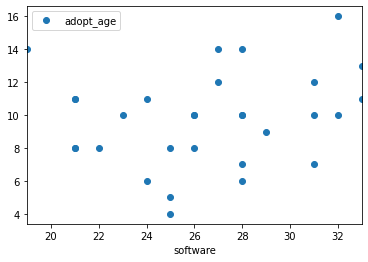

In [35]:
df2.plot(x='software', y='adopt_age', style='o')



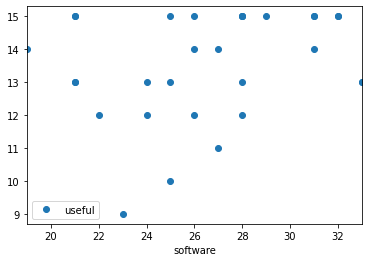

In [36]:
df2.plot(x='software', y='useful', style='o')



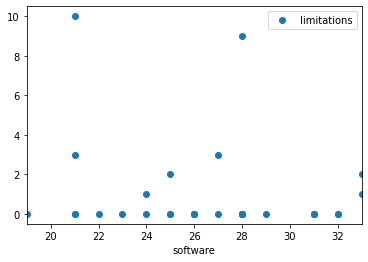

In [37]:
df2.plot(x='software', y='limitations', style='o')



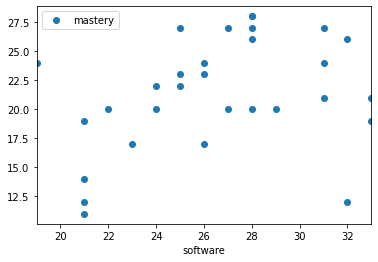

In [38]:
df2.plot(x='software', y='mastery', style='o')

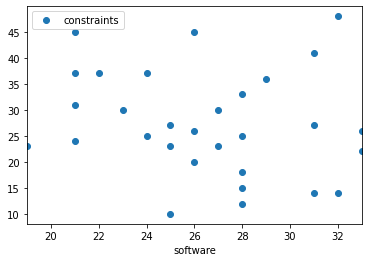

In [39]:
df2.plot(x='software', y='constraints', style='o')



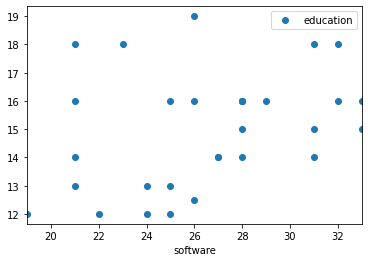

In [40]:
df2.plot(x='software', y='education', style='o')



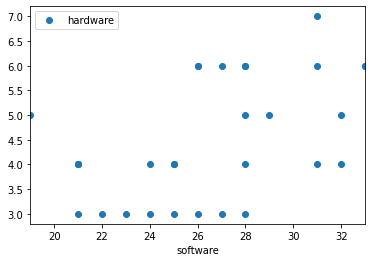

In [41]:
df2.plot(x='software', y='hardware', style='o')



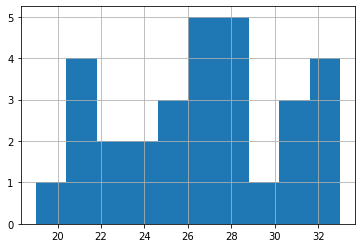

In [42]:
df2['software'].hist()

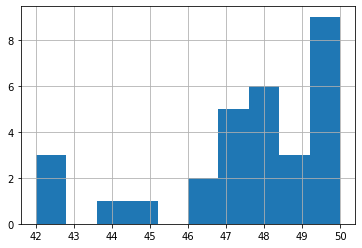

In [43]:
df2['cpq'].hist()

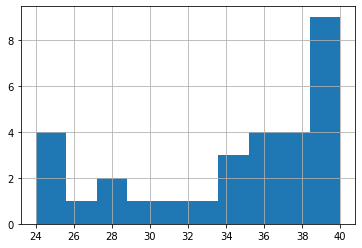

In [44]:
df2['wnpq'].hist()

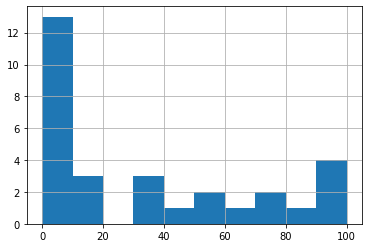

In [45]:
df2['inheritance_1'].hist()

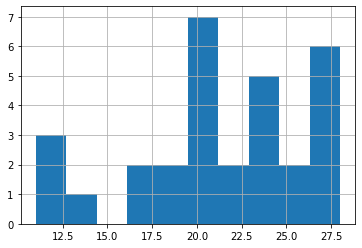

In [46]:
df2['mastery'].hist()

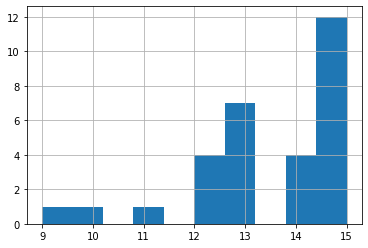

In [47]:
df2['useful'].hist()